In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('Clean_Dataset.csv')

In [4]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [5]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [6]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [7]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [8]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [9]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [10]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [11]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [12]:
df['duration'].min()

np.float64(0.83)

In [13]:
df['duration'].max()

np.float64(49.83)

In [14]:
df['duration'].median()

np.float64(11.25)

### Preprocessing

In [15]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('flight', axis=1)

df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)

In [16]:
df.stops = pd.factorize(df.stops)[0]

In [17]:
df = df.join(pd.get_dummies(df.airline, prefix='airline')).drop('airline', axis=1)
df = df.join(pd.get_dummies(df.source_city, prefix='source_city')).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival_time')).drop('arrival_time', axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix='destination_city')).drop('destination_city', axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix='departure_time')).drop('departure_time', axis=1)

## Training Regression Model

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

x, y = df.drop('price', axis=1), df.price

In [19]:
y_train, y_test, x_train, x_test = train_test_split(y, x, test_size=0.2)

In [20]:
reg = RandomForestRegressor(n_jobs=-1)

reg.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [21]:
reg.score(x_test, y_test)

0.9853799094723746

In [22]:
import math
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = reg.predict(x_test)

print('R2', r2_score(y_test, y_pred))
print('MAE', r2_score(y_test, y_pred))
print('MSE', r2_score(y_test, y_pred))
print('RMSE', r2_score(y_test, y_pred))

R2 0.9853799094723746
MAE 0.9853799094723746
MSE 0.9853799094723746
RMSE 0.9853799094723746


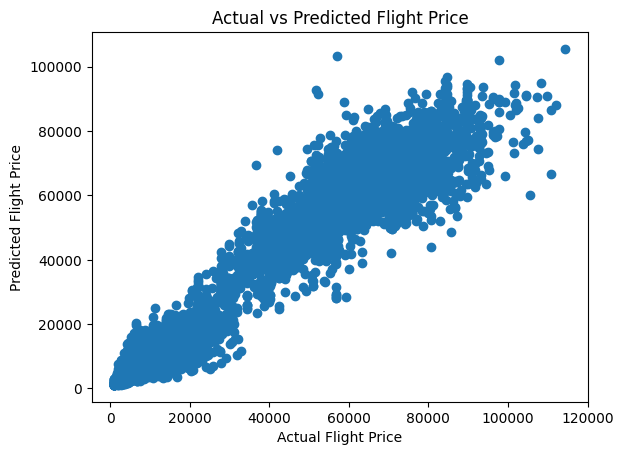

In [23]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Actual vs Predicted Flight Price')
plt.show()

In [24]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [25]:
importance = dict(zip(x_train.columns, reg.feature_importances_))
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

sorted_importance

[('class', np.float64(0.8801500644329193)),
 ('duration', np.float64(0.057461451025745194)),
 ('days_left', np.float64(0.018573687574630973)),
 ('airline_Air_India', np.float64(0.005440249300684191)),
 ('airline_Vistara', np.float64(0.004387047421875115)),
 ('source_city_Delhi', np.float64(0.0039048773040077237)),
 ('destination_city_Delhi', np.float64(0.0035055200761183176)),
 ('source_city_Mumbai', np.float64(0.0022008986035150185)),
 ('destination_city_Kolkata', np.float64(0.0018959436064414207)),
 ('destination_city_Mumbai', np.float64(0.0018122099327388217)),
 ('stops', np.float64(0.0018072593449111423)),
 ('source_city_Kolkata', np.float64(0.0017106653505121014)),
 ('arrival_time_Evening', np.float64(0.0015053673642796703)),
 ('destination_city_Hyderabad', np.float64(0.0014814368012433371)),
 ('source_city_Hyderabad', np.float64(0.0012593845705828155)),
 ('destination_city_Bangalore', np.float64(0.0012478366947859304)),
 ('arrival_time_Night', np.float64(0.001177039440350773)),
 

In [26]:
important_features_dict = {}
for idx, val in enumerate(reg.feature_importances_):
    important_features_dict[idx] = val

important_features_list = sorted(important_features_dict, key=important_features_dict.get, reverse=True)

print(f'5 most important features: {important_features_list[:5]}')

5 most important features: [1, 2, 3, 5, 9]


In [27]:
df.days_left.describe()

count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

<BarContainer object of 10 artists>

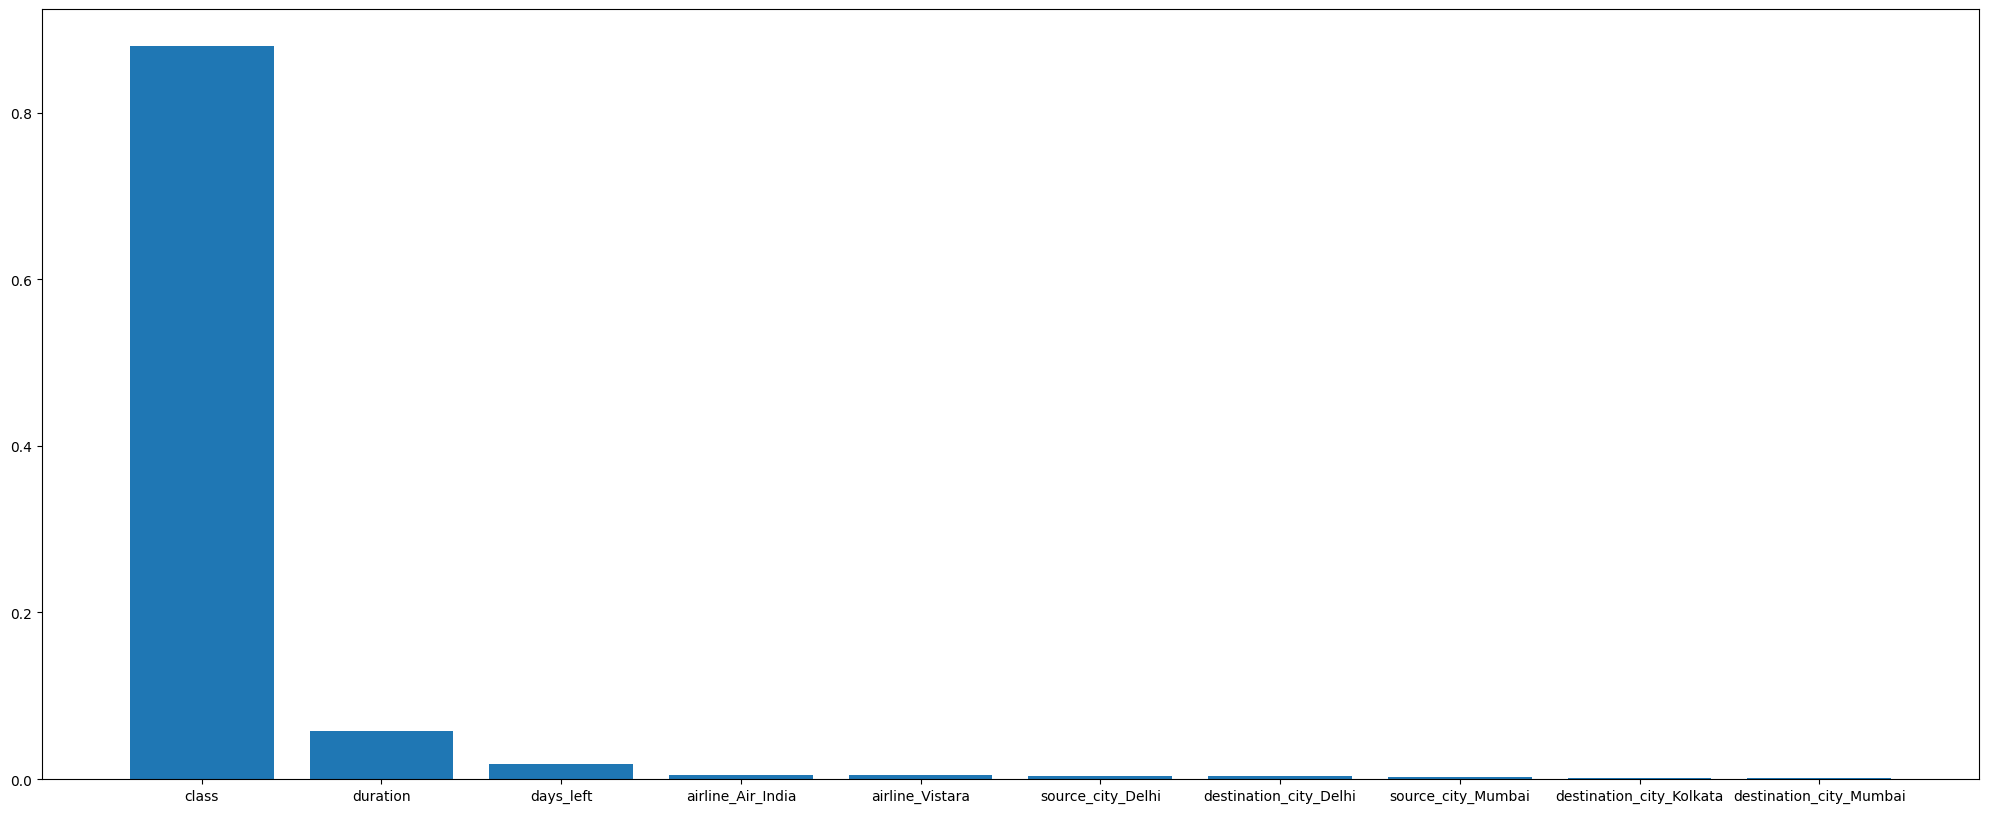

In [28]:
plt.figure(figsize=(25, 10))
plt.bar([x[0] for x in sorted_importance[:10]], height=[x[1] for x in sorted_importance[:10]])

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
  'n_estimators': randint(100, 200),
  'max_depth': [None, 10, 20],
  'min_samples_split': randint(2, 6),
  'min_samples_leaf': randint(1, 3),
  'max_features': [1.0, 'sqrt']
}


reg = RandomForestRegressor(n_jobs=-1)

random_search = RandomizedSearchCV(reg, param_distributions=param_dist, n_iter=1, cv=3,
                                    scoring='neg_mean_squared_error', verbose=2, random_state=42, n_jobs=-1)

random_search.fit(x_train, y_train)

best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [30]:
best_regressor.score(x_train, y_train)

0.9885580479668284

In [31]:
import math
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = best_regressor.predict(x_test)

print('R2', r2_score(y_test, y_pred))
print('MAE', r2_score(y_test, y_pred))
print('MSE', r2_score(y_test, y_pred))
print('RMSE', r2_score(y_test, y_pred))

R2 0.982119823849963
MAE 0.982119823849963
MSE 0.982119823849963
RMSE 0.982119823849963


Text(0.5, 1.0, 'Actual vs Predicted Flight Price')

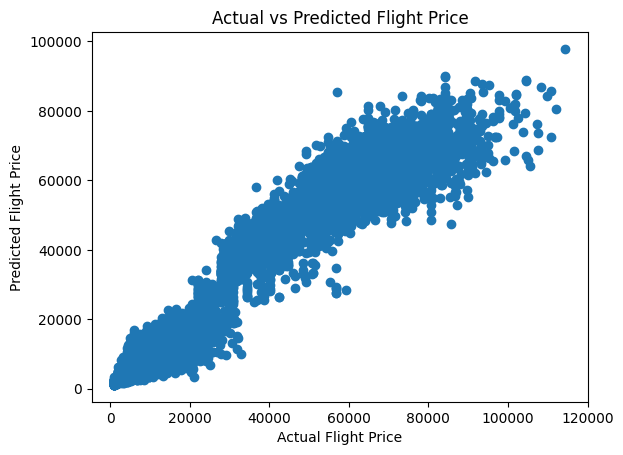

In [32]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Actual vs Predicted Flight Price')

In [33]:
predictions = best_regressor.predict(x_test) 
print(predictions)

[17044.52282507 27632.68894108  7846.48273429 ... 43294.58353129
  8033.3021909   6043.07948048]
